<a href="https://colab.research.google.com/github/Fahma-n/Deep-Learning/blob/main/CNN_Mnist.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets import mnist
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from PIL import Image


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from keras.utils import to_categorical
from keras.layers import Conv2D,MaxPooling2D,Flatten,BatchNormalization

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation,Dropout

In [ ]:
import os
import cv2

In [ ]:
Encoder=OneHotEncoder()
Encoder.fit([[0],[1]])

OneHotEncoder()

In [ ]:
data=[]
paths=[]
result=[]
for r,d,f in os.walk("/content/drive/MyDrive/Mnist/0"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if (Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(Encoder.transform([[0]]).toarray())

In [ ]:
paths=[]
for r,d,f in os.walk("/content/drive/MyDrive/Mnist/1"):
  for file in f:
    if ".jpg" in file:
      paths.append(os.path.join(r,file))
for path in paths:
  Img=Image.open(path)
  Img=Img.resize((128,128))
  Img=np.array(Img)
  if (Img.shape==(128,128,3)):
    data.append(np.array(Img))
    result.append(Encoder.transform([[1]]).toarray())


In [ ]:
data=np.array(data)
data.shape

(256, 128, 128, 3)

In [ ]:
result=np.array(result)
result=result.reshape(256,2)

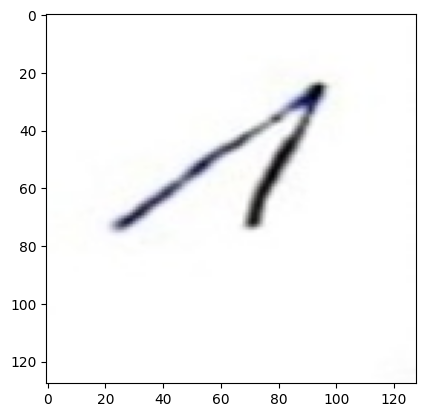

In [ ]:
plt.imshow(data[206])

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(data,result,test_size=0.2,shuffle=True,random_state=0)

In [ ]:
model=Sequential()
model.add(Conv2D(32,kernel_size=(2,2),input_shape=(128,128,3),padding="same"))
model.add(Conv2D(32,(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))

model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(Conv2D(64,kernel_size=(2,2),activation="relu",padding="same"))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())

model.add(Dense(512,activation="relu"))
model.add(Dropout(0.5))
model.add(Dense(2,Activation("softmax")))
model.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_32 (Conv2D)          (None, 128, 128, 32)      416       
                                                                 
 conv2d_33 (Conv2D)          (None, 128, 128, 32)      4128      
                                                                 
 batch_normalization_16 (Ba  (None, 128, 128, 32)      128       
 tchNormalization)                                               
                                                                 
 max_pooling2d_16 (MaxPooli  (None, 64, 64, 32)        0         
 ng2D)                                                           
                                                                 
 dropout_20 (Dropout)        (None, 64, 64, 32)        0         
                                                                 
 conv2d_34 (Conv2D)          (None, 64, 64, 64)       

In [ ]:
model.compile(loss="binary_crossentropy",optimizer="sgd",metrics=["accuracy"])

In [ ]:
xtrain.shape

(204, 128, 128, 3)

In [ ]:
ytrain.shape

(204, 2)

In [ ]:
history=model.fit(xtrain,ytrain,epochs=5,batch_size=64,verbose=1,validation_data=(xtest,ytest))

Epoch 1/5
4/4 [==============================] - 16s 4s/step - loss: 1.2357 - accuracy: 0.6029 - val_loss: 0.7756 - val_accuracy: 0.6923
Epoch 2/5
4/4 [==============================] - 14s 4s/step - loss: 0.9110 - accuracy: 0.7108 - val_loss: 1.1562 - val_accuracy: 0.6923
Epoch 3/5
4/4 [==============================] - 14s 4s/step - loss: 0.8653 - accuracy: 0.7108 - val_loss: 0.6390 - val_accuracy: 0.6923
Epoch 4/5
4/4 [==============================] - 16s 4s/step - loss: 1.0737 - accuracy: 0.6520 - val_loss: 0.7634 - val_accuracy: 0.6923
Epoch 5/5
4/4 [==============================] - 14s 4s/step - loss: 0.7764 - accuracy: 0.7647 - val_loss: 0.7113 - val_accuracy: 0.6923


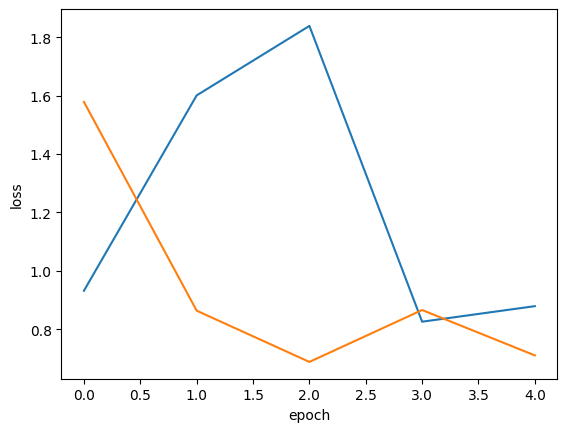

In [ ]:
plt.plot(history.history["val_loss"])
plt.plot(history.history["loss"])
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

In [ ]:
def num(s):
  if (s==1):
    return "One"
  else:
    return "Zero"


 It is a Zero


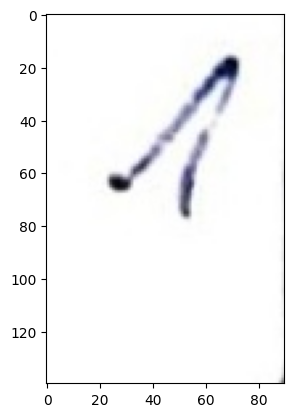

In [ ]:
img=Image.open("/content/drive/MyDrive/Mnist/1/One_full (2).jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
classification = classification.astype(int)
print(" It is a " + num(classification))

It is a Zero


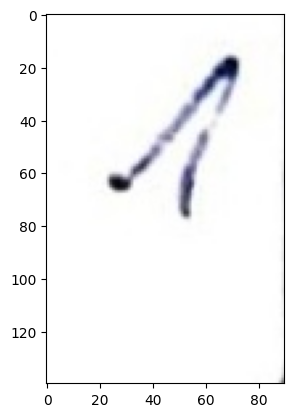

In [ ]:
img=Image.open("/content/drive/MyDrive/Mnist/1/One_full (2).jpg")
x=np.array(img.resize((128,128)))
x=x.reshape(((1,128,128,3)))
res=model.predict_on_batch(x)
classification=np.where(res==np.amax(res))[1][0]
plt.imshow(img)
classification = classification.astype(int)
print("It is a " + num(classification))